In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [15]:
df = pd.read_csv("Churn_Modelling.csv")
print("✅ Data Loaded Successfully\n")
df.head()

✅ Data Loaded Successfully



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
print("Shape of dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Summary statistics
df.describe()

Shape of dataset: (10000, 14)

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Geography'] = df['Geography'].map({'France':1,'Germany':2,'Spain':3})

ignore_cols = ['RowNumber','CustomerId','Surname','Exited']
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ignore_cols]

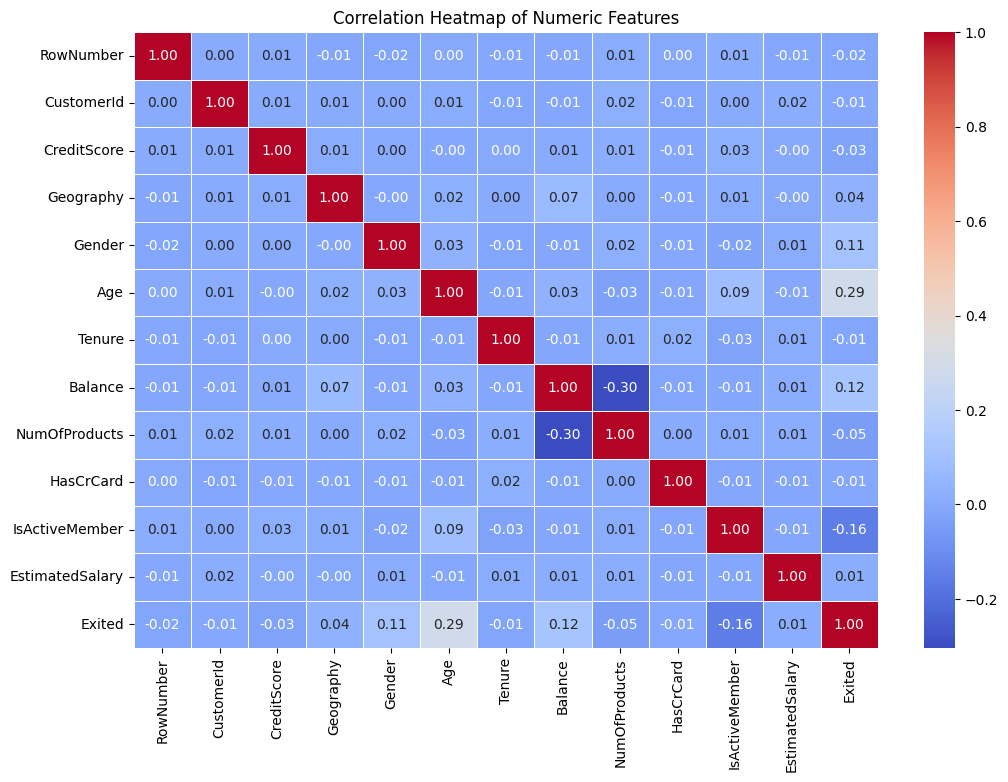

In [18]:
 #📊 Correlation Heatmap Visualization
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nSkewness before Transformation:")
for col in numeric_cols:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.2f}")


Skewness before Transformation:
RowNumber: 0.00
CustomerId: 0.00
CreditScore: -0.07
Geography: 0.50
Gender: 0.18
Age: 1.01
Tenure: 0.01
Balance: -0.14
NumOfProducts: 0.75
HasCrCard: -0.90
IsActiveMember: -0.06
EstimatedSalary: 0.00
Exited: 1.47


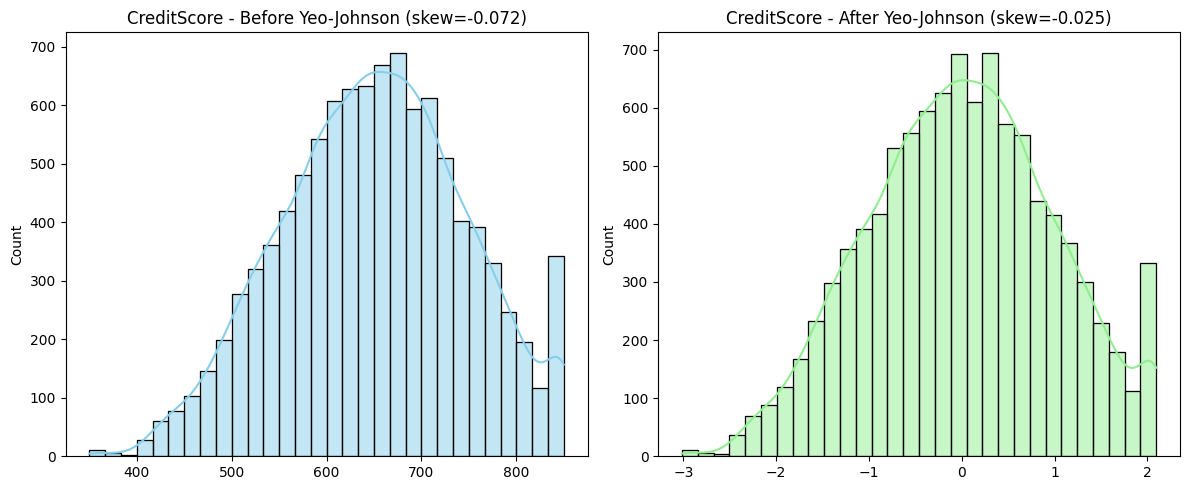

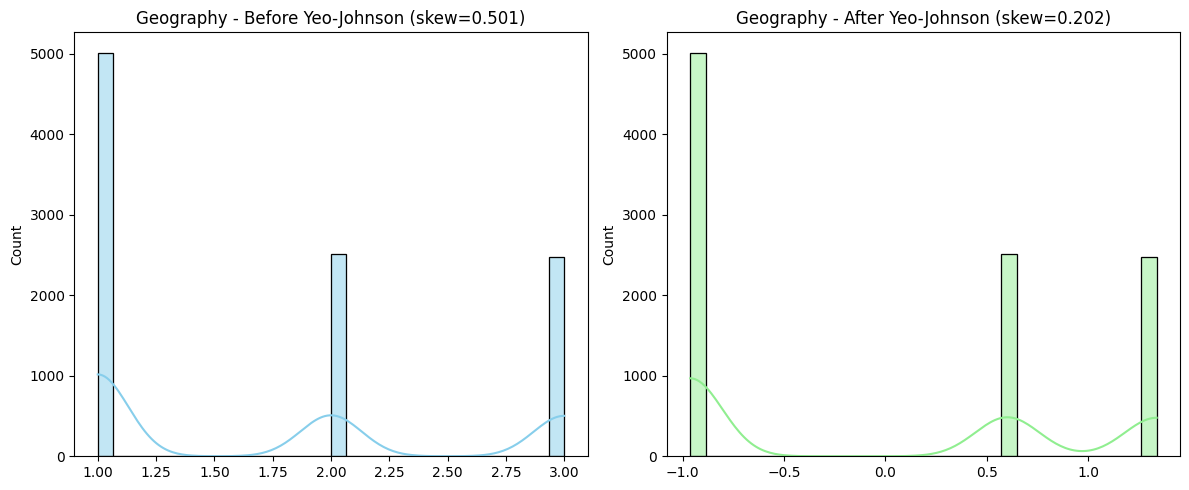

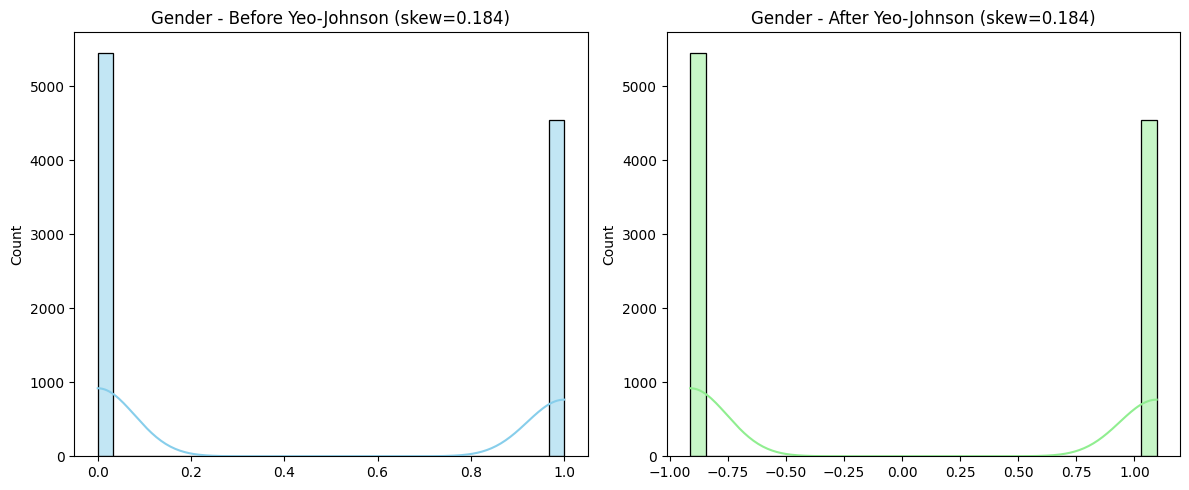

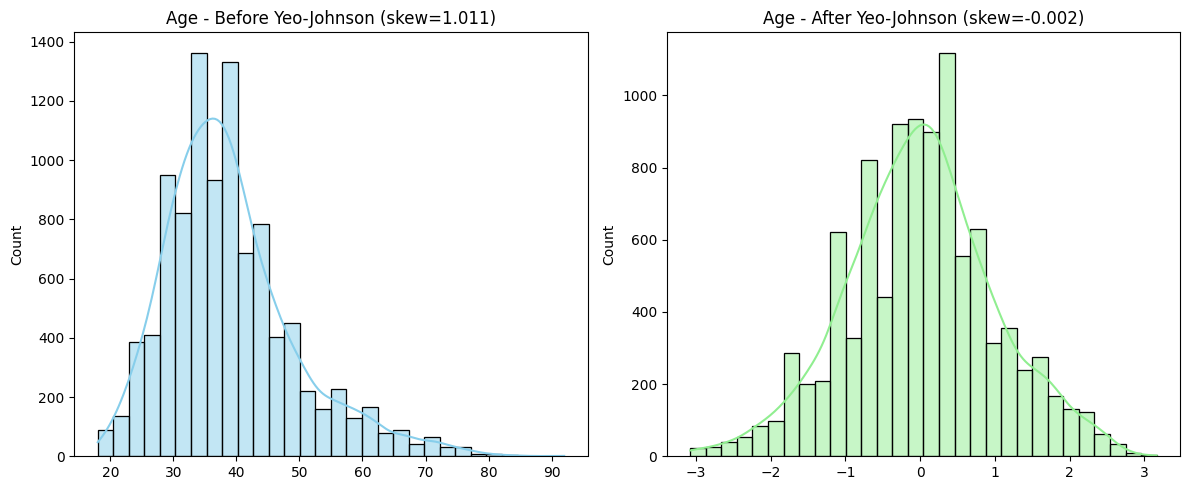

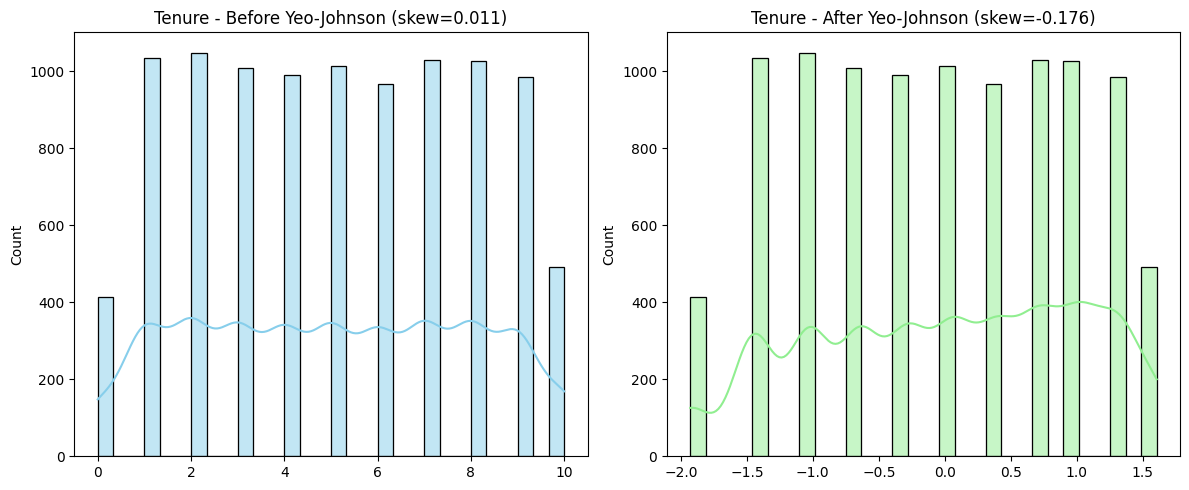

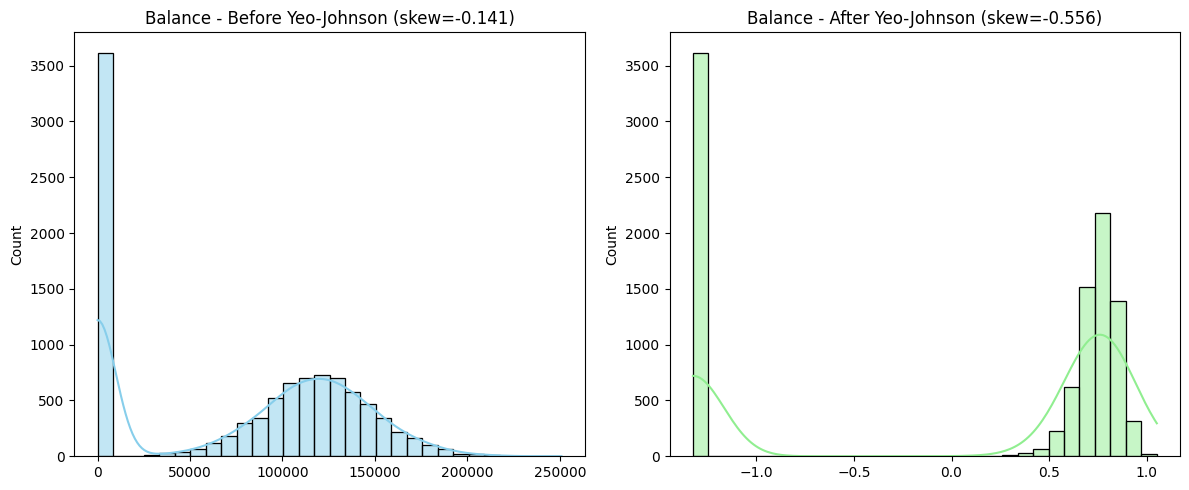

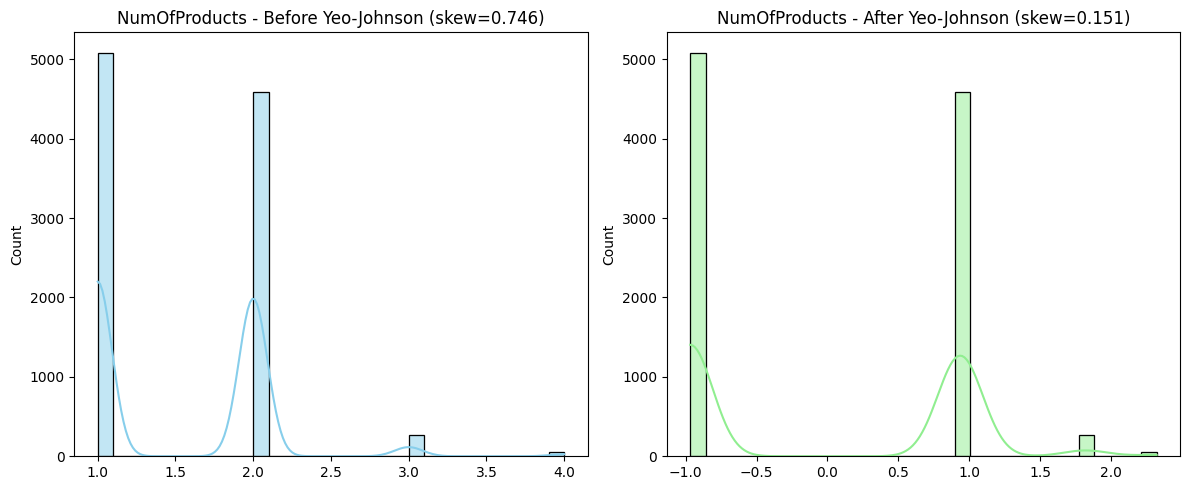

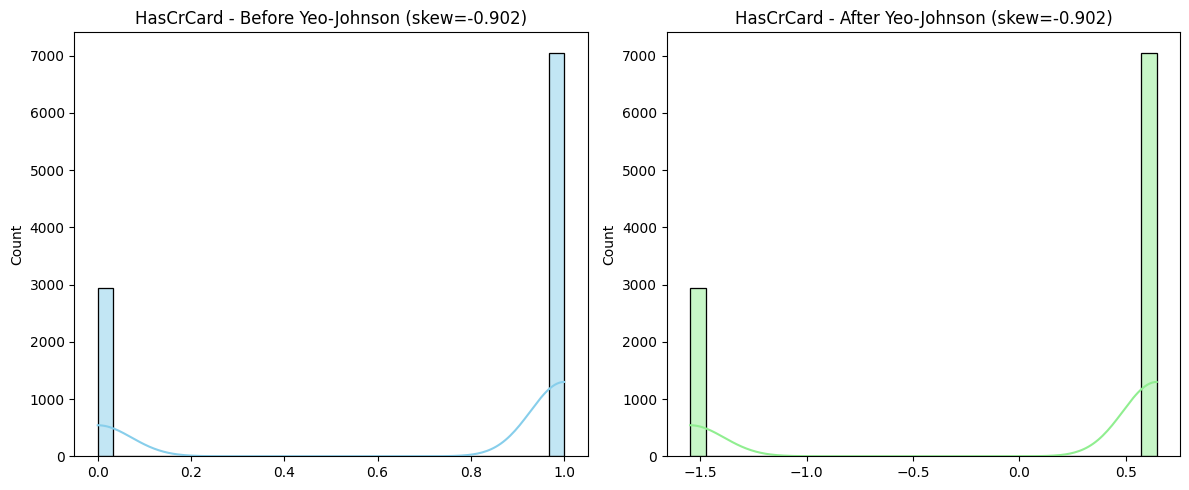

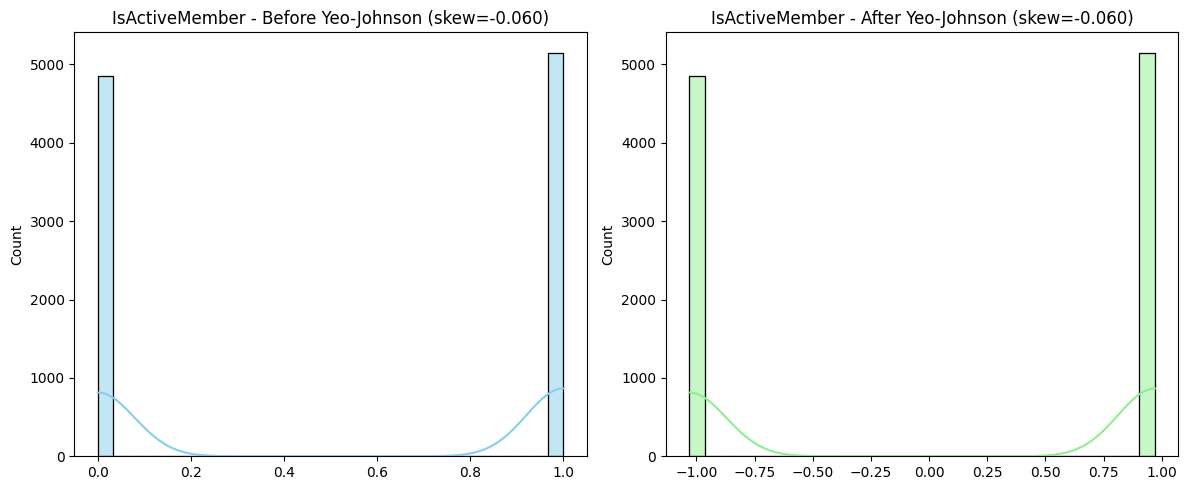

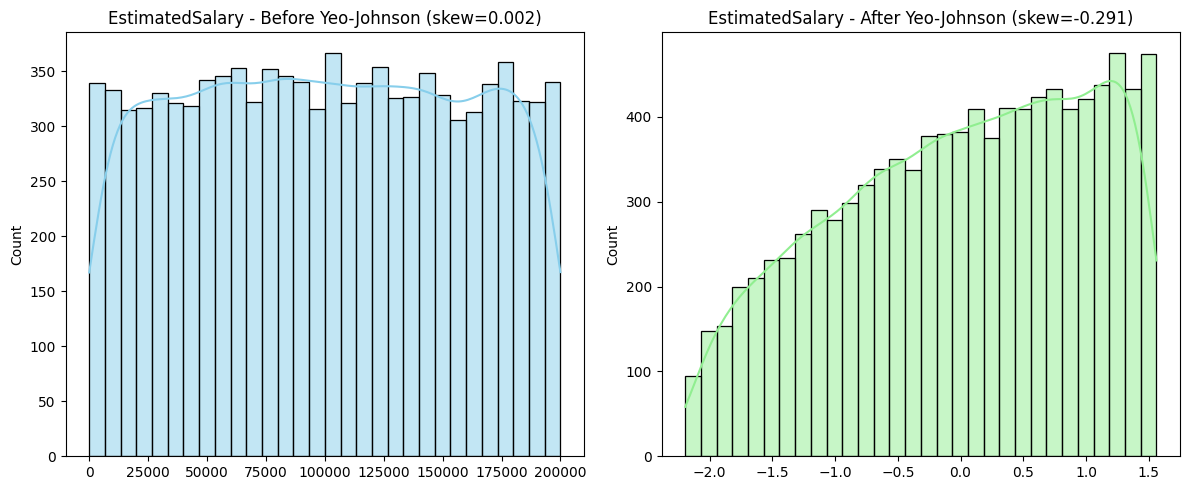

In [20]:
transformer = PowerTransformer(method='yeo-johnson')

for col in num_cols:
    arr = df[col].values.reshape(-1,1)
    skew_before = pd.Series(arr.ravel()).skew()
    transformed = transformer.fit_transform(arr).ravel()
    skew_after = pd.Series(transformed).skew()

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(arr.ravel(), kde=True, color='skyblue', bins=30)
    plt.title(f'{col} - Before Yeo-Johnson (skew={skew_before:.3f})')

    plt.subplot(1,2,2)
    sns.histplot(transformed, kde=True, color='lightgreen', bins=30)
    plt.title(f'{col} - After Yeo-Johnson (skew={skew_after:.3f})')

    plt.tight_layout()
    plt.show()

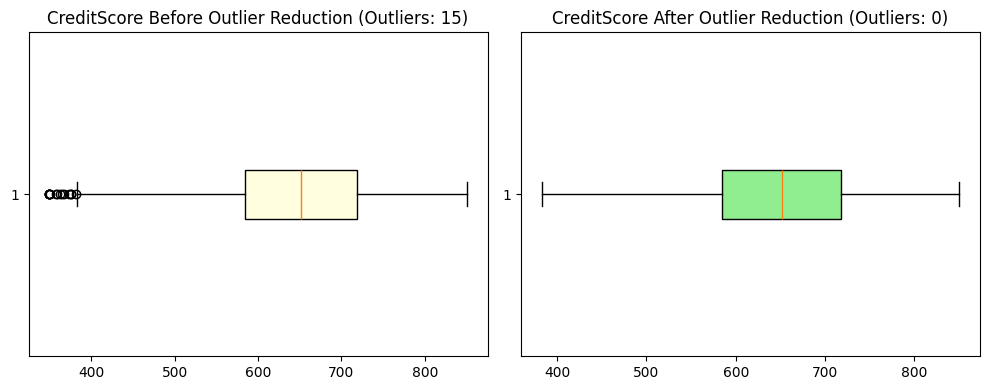

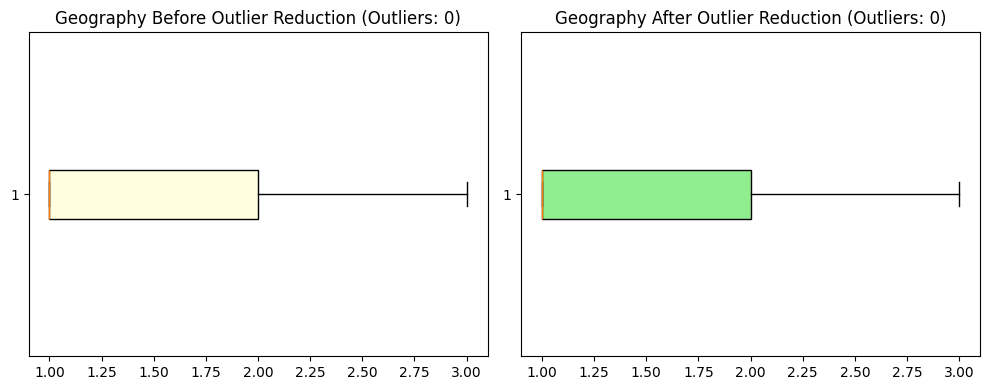

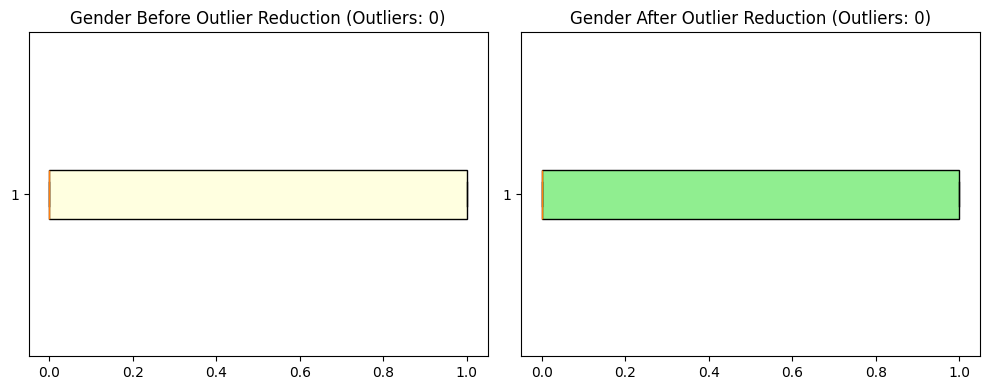

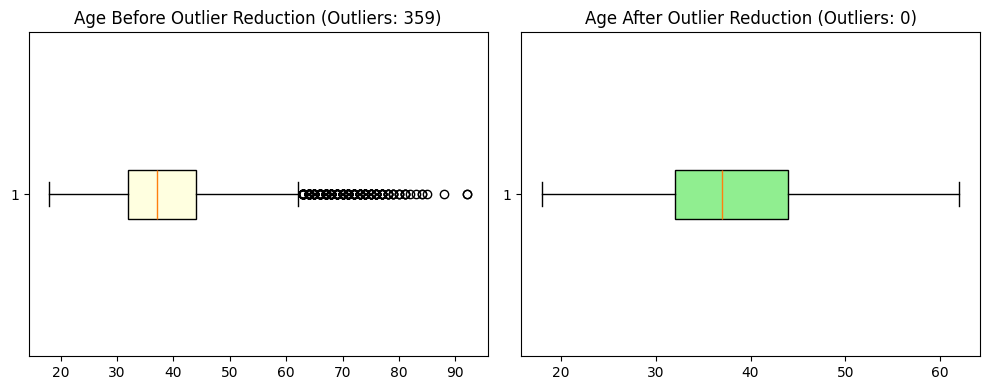

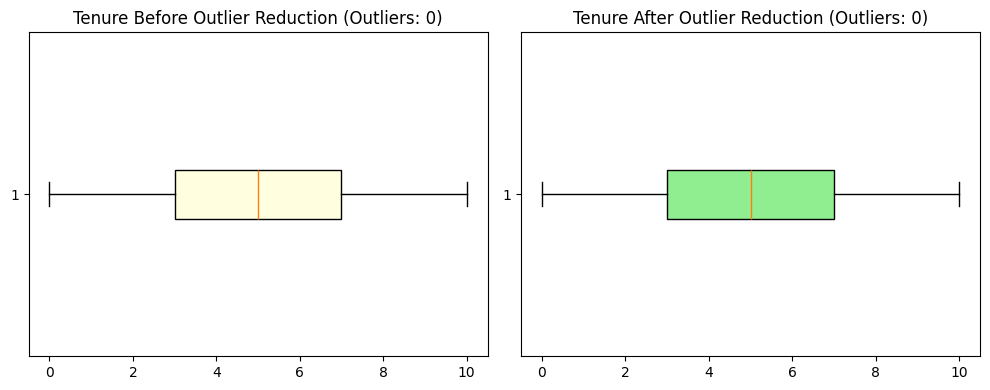

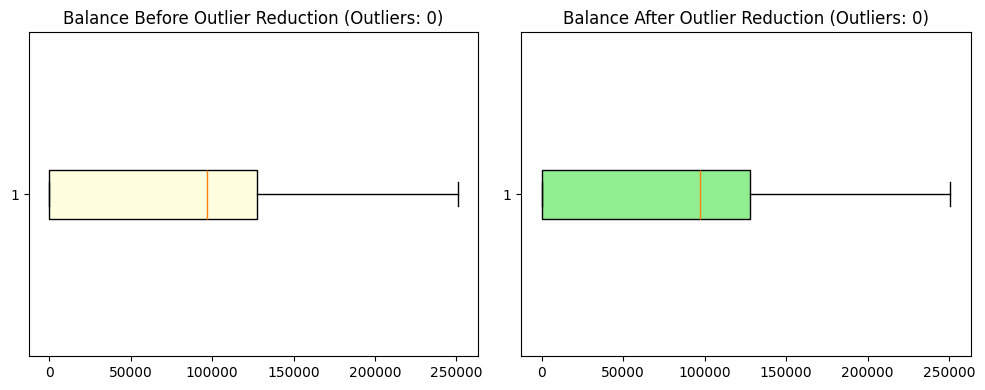

C:\Users\vinot\AppData\Local\Temp\ipykernel_14524\2044329825.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  series_capped[series_capped>high] = high


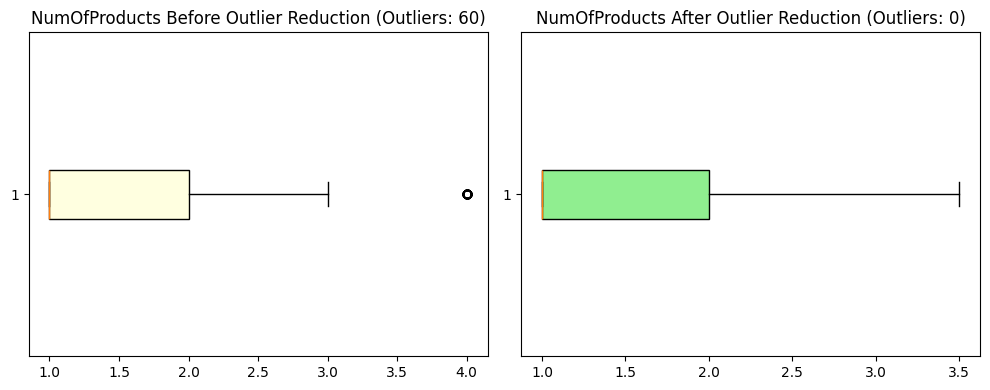

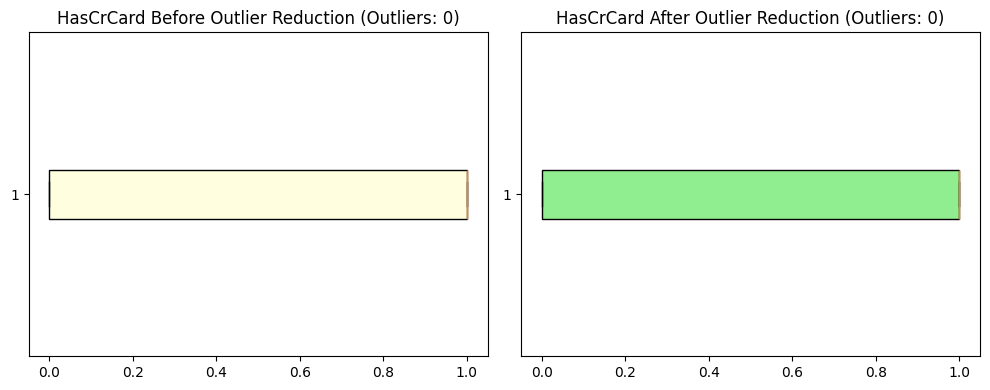

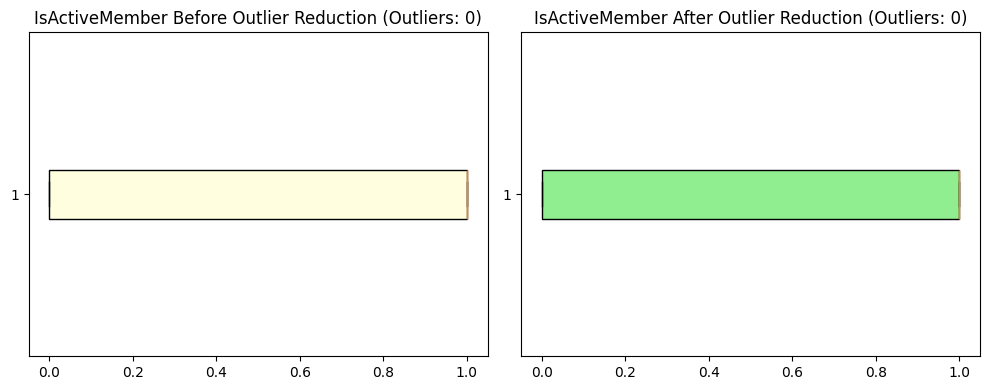

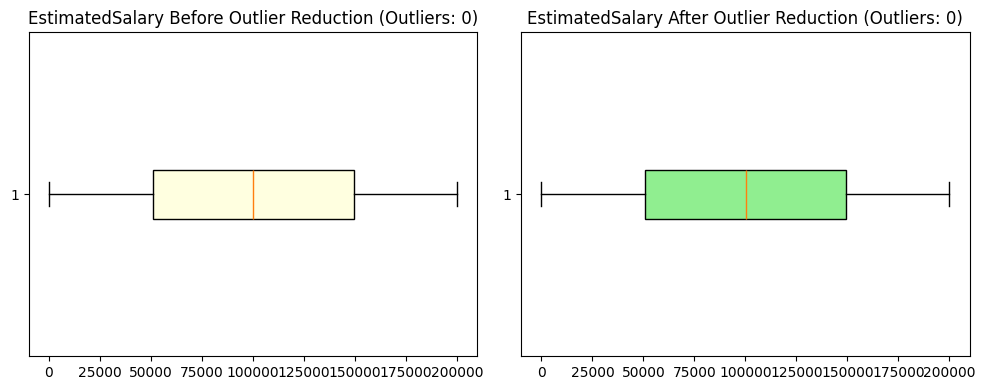


Outlier counts before reduction:
CreditScore: 15
Geography: 0
Gender: 0
Age: 359
Tenure: 0
Balance: 0
NumOfProducts: 60
HasCrCard: 0
IsActiveMember: 0
EstimatedSalary: 0

Outlier counts after reduction:
CreditScore: 0
Geography: 0
Gender: 0
Age: 0
Tenure: 0
Balance: 0
NumOfProducts: 0
HasCrCard: 0
IsActiveMember: 0
EstimatedSalary: 0


In [21]:
outlier_counts_before = {}
outlier_counts_after = {}
for col in num_cols:
    series = df[col]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR

    outliers = series[(series<low)|(series>high)]
    outlier_counts_before[col] = outliers.shape[0]

    series_capped = series.copy()
    series_capped[series_capped<low] = low
    series_capped[series_capped>high] = high
    outlier_counts_after[col] = ((series_capped<low)|(series_capped>high)).sum()
    df[col] = series_capped

    # Side-by-side boxplots
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.boxplot(series, vert=False, patch_artist=True, boxprops=dict(facecolor='lightyellow'))
    plt.title(f'{col} Before Outlier Reduction (Outliers: {outlier_counts_before[col]})')

    plt.subplot(1,2,2)
    plt.boxplot(series_capped, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f'{col} After Outlier Reduction (Outliers: {outlier_counts_after[col]})')
    plt.tight_layout()
    plt.show()

print('\nOutlier counts before reduction:')
for k,v in outlier_counts_before.items():
    print(f'{k}: {v}')

print('\nOutlier counts after reduction:')
for k,v in outlier_counts_after.items():
    print(f'{k}: {v}')


In [23]:
le = LabelEncoder()

# Encode categorical columns
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# Drop unnecessary columns
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'], errors='ignore')
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Preprocessing Completed")

✅ Preprocessing Completed


In [25]:
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\ANN\env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7155 - loss: 0.5885 - val_accuracy: 0.7987 - val_loss: 0.4847
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7942 - loss: 0.4631 - val_accuracy: 0.8044 - val_loss: 0.4387
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8039 - loss: 0.4321 - val_accuracy: 0.8219 - val_loss: 0.4213
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8163 - loss: 0.4158 - val_accuracy: 0.8263 - val_loss: 0.4102
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8241 - loss: 0.4044 - val_accuracy: 0.8363 - val_loss: 0.4001
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8305 - loss: 0.3940 - val_accuracy: 0.8406 - val_loss: 0.3902
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8358 - loss: 0.3840 - val_accuracy: 0.8394 - val_loss: 0.3836
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8422 - loss: 0.3756 - val_accuracy: 0.

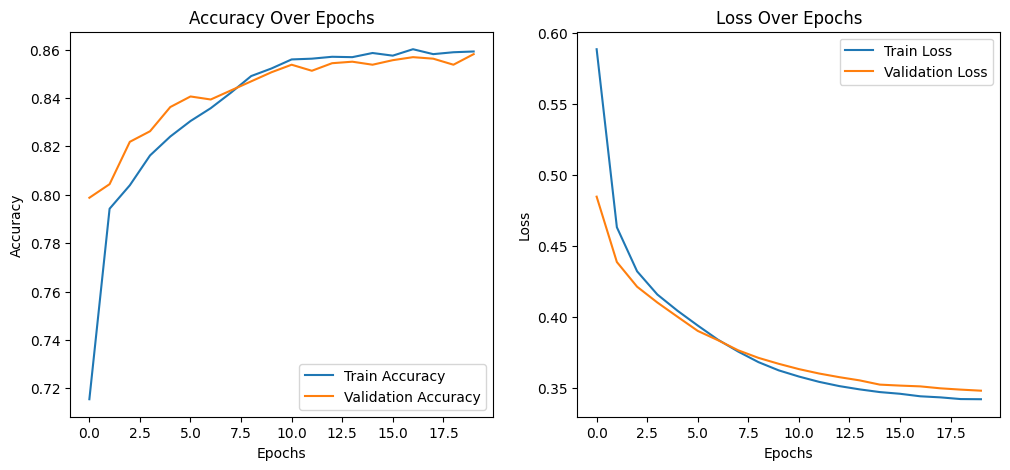

In [30]:
#7️⃣ Plot Accuracy and Loss Curves
# --------------------------------------------

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


✅ Test Accuracy: 85.30%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
 [[1537   70]
 [ 224  169]]

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



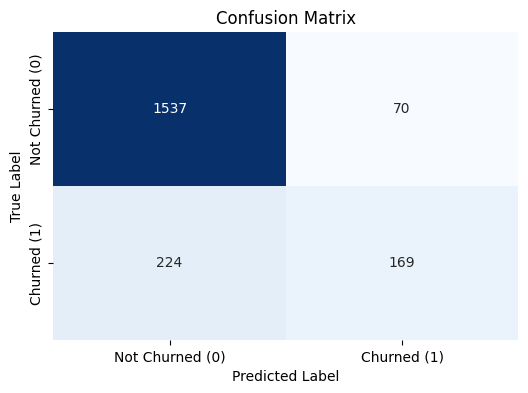

In [34]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 2️⃣ Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ['Not Churned (0)', 'Churned (1)'])
plt.yticks([0.5, 1.5], ['Not Churned (0)', 'Churned (1)'])
plt.show()


In [32]:
# 9️⃣ Predict for a Random Customer
# --------------------------------------------

random_index = np.random.randint(0, X_test.shape[0])
sample = X_test[random_index].reshape(1, -1)
prediction = model.predict(sample)[0][0]

print("Predicted Probability of Churn:", prediction)
print("Customer likely to churn" if prediction > 0.5 else "Customer will not churn")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted Probability of Churn: 0.11445341
Customer will not churn


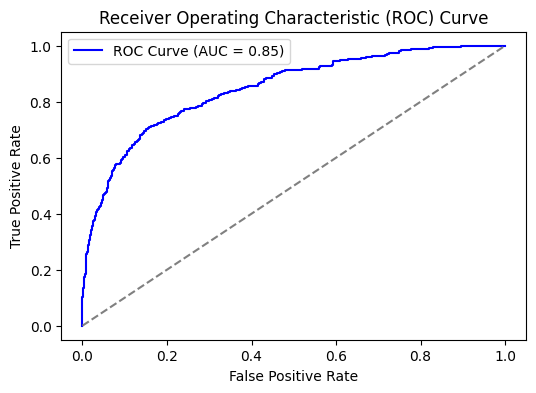

In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [39]:
sample_data = [[600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]]  # Example input
sample_scaled = scaler.transform(sample_data)
pred = model.predict(sample_scaled)[0][0]
print(f"Churn Probability: {pred:.2f}")
print("Customer likely to churn" if pred > 0.5 else "Customer will not churn")


c:\ANN\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Churn Probability: 0.04
Customer will not churn


In [41]:
# Save properly in new format
model.save("ann_churn_model.keras")   # <-- use .keras instead of .h5
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']